In [1]:
import osmnx as ox
import networkx as nx

import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.img_tiles import GoogleTiles




In [2]:
%matplotlib inline

## Local Road Network ##

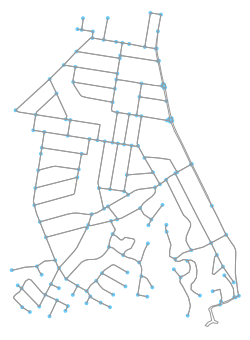

In [7]:

place_name = "Coolum Beach, Queensland, Australia"

graph = ox.graph_from_address(place_name, network_type='drive')

fig, ax = ox.plot_graph(graph)

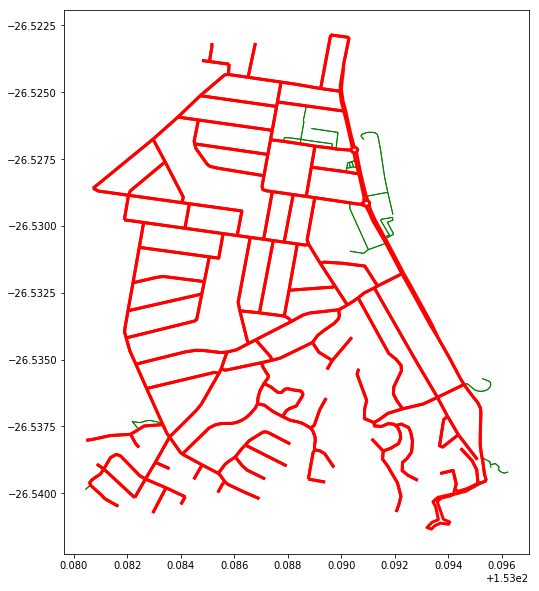

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10) )
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')
graph2 = ox.graph_from_address(place_name, network_type='walk')

g_node2, g_edge2 = ox.save_load.graph_to_gdfs(graph2)
g_node1, g_edge1 = ox.save_load.graph_to_gdfs(graph1)

g_edge2.plot(ax=ax,  color='green', linewidth=1)
g_edge1.plot(ax=ax,  color='red', linewidth=3)


plt.show()

In [10]:
g_edge2.head()

,bridge,geometry,highway,junction,key,length,maxspeed,name,oneway,osmid,ref,service,u,v
0,NaN,"LINESTRING (153.0824461 -26.5308044, 153.08506...",residential,NaN,0,263.539,NaN,Jones Parade,False,34904024,NaN,NaN,409456660,409456680
1,NaN,"LINESTRING (153.0824461 -26.5308044, 153.08238...",residential,NaN,0,40.326,NaN,Central Avenue,False,437521280,NaN,NaN,409456660,409456677
2,NaN,"LINESTRING (153.0824461 -26.5308044, 153.08261...",residential,NaN,0,104.622,NaN,Central Avenue,False,437521280,NaN,NaN,409456660,409456379
3,NaN,"LINESTRING (153.0823827 -26.5311626, 153.08221...",residential,NaN,0,108.945,NaN,Central Avenue,False,437521280,NaN,NaN,409456677,409456691
4,NaN,"LINESTRING (153.0823827 -26.5311626, 153.08244...",residential,NaN,0,40.326,NaN,Central Avenue,False,437521280,NaN,NaN,409456677,409456660


## Display different edge types

Unique "driveable" highway types:  ['residential' 'primary']
Unique "walkable" highway types:  ['residential' 'service' 'primary' 'footway' 'path_steps']


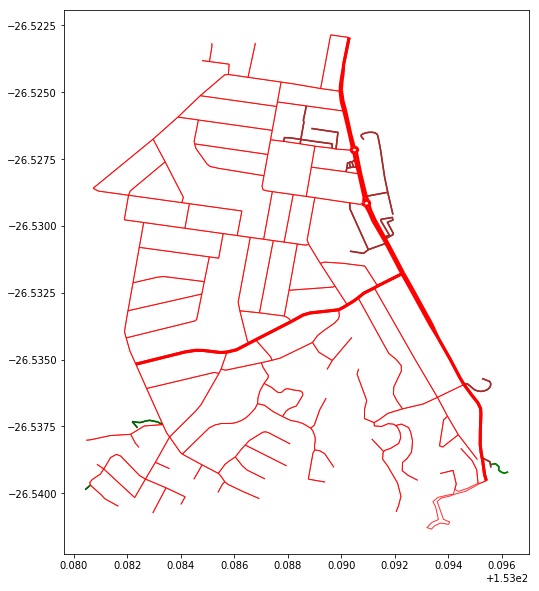

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,10) )
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')
graph2 = ox.graph_from_address(place_name, network_type='walk')

g_node2, g_edge2 = ox.save_load.graph_to_gdfs(graph2)
g_node1, g_edge1 = ox.save_load.graph_to_gdfs(graph1)

print('Unique "driveable" highway types: ', g_edge1['highway'].unique() )

#  replace nested lists in g_edge2, with string
mask = [(type(x)==str) for x in g_edge2['highway'] ]
gg = g_edge2['highway'].where(mask, other='path_steps', )

g_edge2['highway'] = gg

print('Unique "walkable" highway types: ', g_edge2['highway'].unique() )

g_edge2[g_edge2['highway']=='path_steps'].plot(ax=ax, color='green')
g_edge2[g_edge2['highway']=='footway'].plot(ax=ax, color='darkgreen')
g_edge2[g_edge2['highway']=='service'].plot(ax=ax, color='brown')

g_edge1[g_edge1['highway']=='primary'].plot(ax=ax, color='red', linewidth=3)
g_edge1[g_edge1['highway']=='residential'].plot(ax=ax, color='red', linewidth=1, alpha=0.8)

plt.show()

## Show Buildings

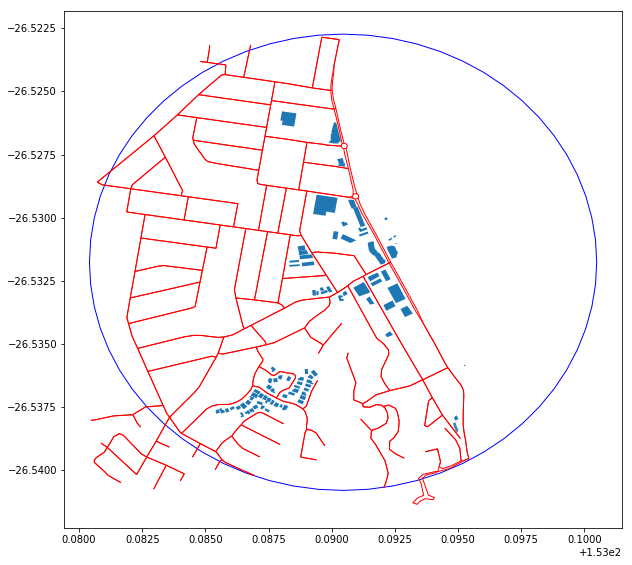

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,10) )
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')

area = ox.gdf_from_place(place_name, buffer_dist=1000)
bb=ox.buildings.buildings_from_polygon(area['geometry'][0])

g_node1, g_edge1 = ox.save_load.graph_to_gdfs(graph1)


g_edge1.plot(ax=ax,  color='red', linewidth=1)
bb.plot(ax=ax)

area.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

plt.show()

## Display blueprint style graphic

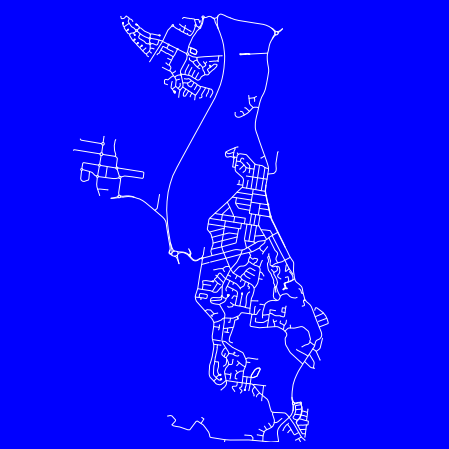

In [21]:
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive', distance=4000)

fig, ax = ox.plot.plot_figure_ground(graph1, 
                                     edge_color='white', 
                                     bgcolor='blue', 
                                     save=False, 
                                     show=True, 
                                     dist=4000,
                                     default_width=1,
                                     street_widths={})

plt.show()

## Display buildings ##

Use GeoPandas plot

    bbox_east  bbox_north  bbox_south   bbox_west  \
0  153.130447  -26.491764  -26.571764  153.050447   

                                            geometry  \
0  POLYGON ((153.1004845479827 -26.53175757978699...   

                           place_name  
0  Coolum Beach, QLD, 4573, Australia  


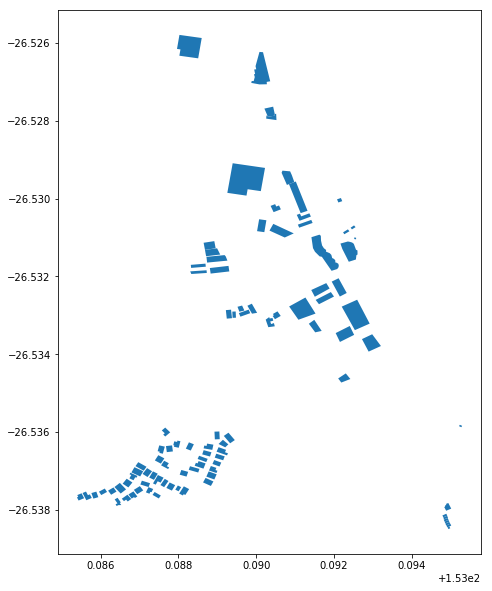

In [23]:
# note use of buffer distance
area = ox.gdf_from_place(place_name, buffer_dist=1000)

print(area.head())

# get polygon
type(area['geometry'][0])

# get buildings in polygon
bb=ox.buildings.buildings_from_polygon(area['geometry'][0])

bb.plot(figsize=(10,10))

 Using OSMNX plot

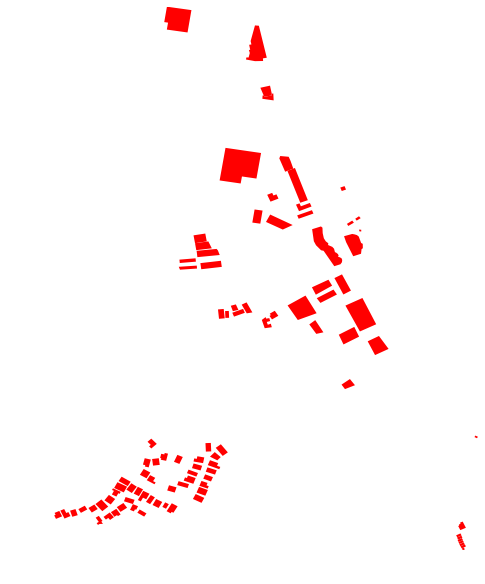

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2621eec2208>)

In [24]:
ox.buildings.plot_buildings(bb, color='red', figsize=(10,10))

### buildings_from_place fails for OSM places with no known area ###

In [ ]:
place_name = "Coolum Beach, Queensland, 4573, Australia"

#b = ox.buildings_from_place(place_name)

### Buildings from Address works

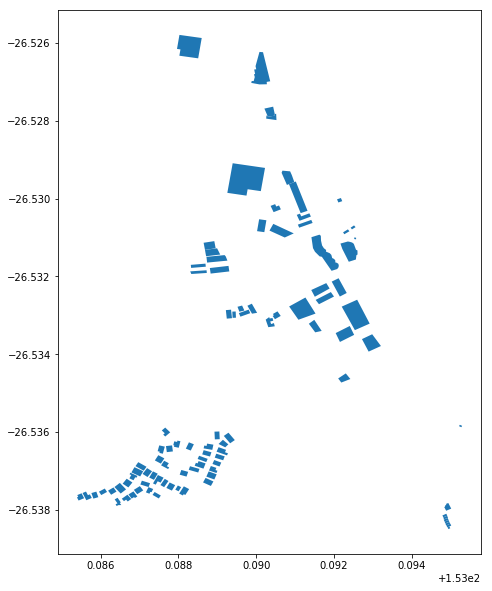

In [27]:
place_name = "Coolum Beach, Queensland, 4573, Australia"

b = ox.buildings_from_address(place_name, 1000)
b.plot(figsize=(10,10))

### Buildings from Point works

In [28]:
home_lat, home_lon = -26.5258277,153.0912987

gdf = ox.buildings_from_point((home_lat, home_lon), distance=1000)
gdf.head()

,amenity,building,geometry,name,nodes,source
44476592,pub,yes,"POLYGON ((153.0900859 -26.5262297, 153.090177 ...",Coolum Beach Hotel,"[565204784, 565204782, 565204786, 565204787, 5...",NaN
186395063,NaN,yes,"POLYGON ((153.0925006 -26.5185487, 153.092556 ...",NaN,"[1970765158, 1970765218, 1970765215, 197076516...",NaN
186396567,NaN,yes,"POLYGON ((153.09208 -26.5300194, 153.0921143 -...",NaN,"[1970785909, 1970785937, 1970785840, 197078583...",NaN
186396571,NaN,yes,"POLYGON ((153.0921678 -26.5311563, 153.0922161...",Surf Life Saving Club,"[1970785933, 1970785831, 1970785919, 197078590...",NaN
186396572,NaN,yes,"POLYGON ((153.0922355 -26.5308675, 153.0922673...",NaN,"[1970785839, 1970785935, 1970785897, 197078583...",NaN


In [29]:
print(gdf['building'].unique() )
print(gdf['amenity'].unique() )
print(gdf['name'].unique() )

['yes' 'public' 'house']
['pub' nan]
['Coolum Beach Hotel' nan 'Surf Life Saving Club' 'Coolum Bowls Club'
 'Coolum RSL']


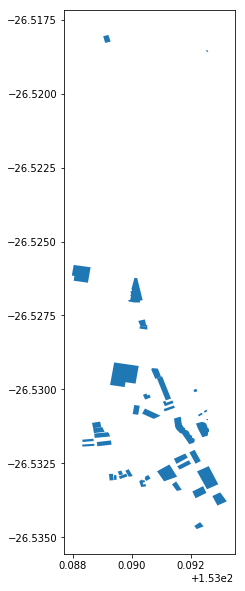

In [30]:
gdf.plot(figsize=(10,10) )

In this example, we get a GeoPandas footprint of an area, extract the polygon embedded in the GeoDataFrame,
and create another GDF of buildings

    bbox_east  bbox_north  bbox_south   bbox_west  \
0  153.130447  -26.491764  -26.571764  153.050447   

                                            geometry  \
0  POLYGON ((153.1004845479827 -26.53175757978699...   

                           place_name  
0  Coolum Beach, QLD, 4573, Australia  


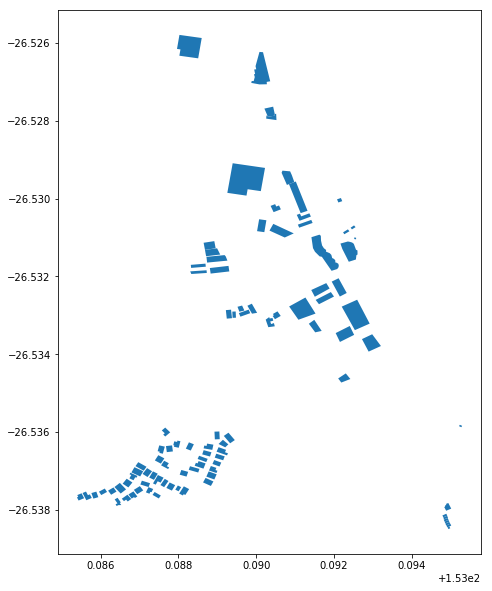

In [31]:
# note use of buffer distance
place_name = "Coolum Beach, Queensland, Australia"
area = ox.gdf_from_place(place_name, buffer_dist=1000)

print(area.head())

# get polygon
type(area['geometry'][0])

# get buildings in polygon

# Note: could specify bounding box, but we don't (compare to buildings_from_polygon - no bbox supported)
bdf = ox.buildings.create_buildings_gdf(area['geometry'][0])
bdf.plot(figsize=(10,10) )


As before get an area polygon, then get buildings inside this polygon

    bbox_east  bbox_north  bbox_south   bbox_west  \
0  153.130447  -26.491764  -26.571764  153.050447   

                                            geometry  \
0  POLYGON ((153.1004845479827 -26.53175757978699...   

                           place_name  
0  Coolum Beach, QLD, 4573, Australia  


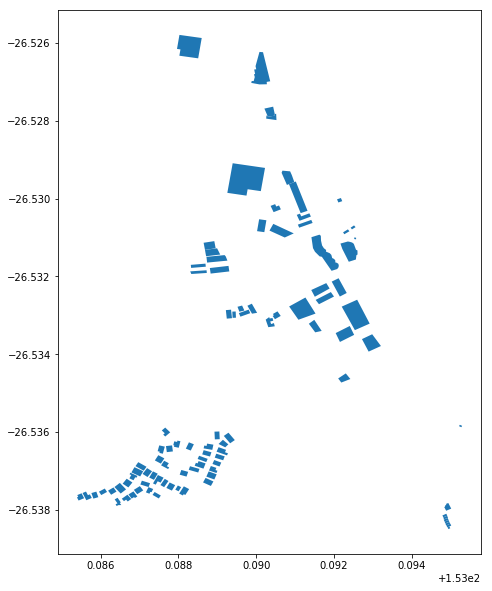

In [32]:
# note use of buffer distance
place_name = "Coolum Beach, Queensland, Australia"
area = ox.gdf_from_place(place_name, buffer_dist=1000)

print(area.head())

# get polygon
type(area['geometry'][0])

# get buildings in polygon
bdf = ox.buildings.buildings_from_polygon(area['geometry'][0])
bdf.plot(figsize=(10, 10) )

## Projections ##

Get network, convert to GeoPandas DataFrame, project into UTM, plot

LINESTRING (153.0824461 -26.5308044, 153.085065 -26.5311608)
LINESTRING (508213.5818227872 -2934471.877454535, 508474.4601503662 -2934511.519806788)


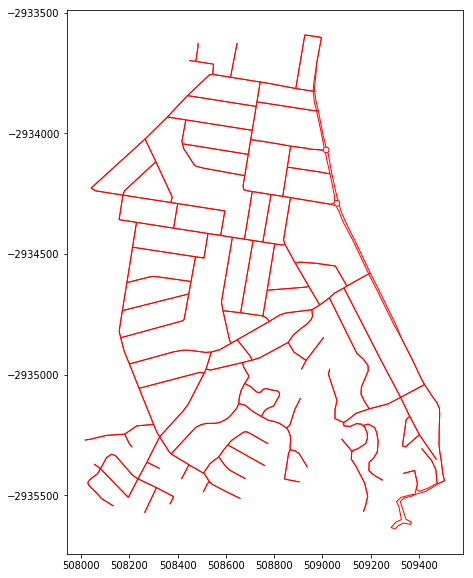

In [33]:

fig, ax = plt.subplots(1, 1, figsize=(10,10) )
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')

g_node1, g_edge1 = ox.save_load.graph_to_gdfs(graph1)

print(g_edge1.loc[0]['geometry'] )
gdf = ox.projection.project_gdf(g_edge1)
print(gdf.loc[0]['geometry'] )
gdf.plot(ax=ax,  edgecolor='red', linewidth=1)

plt.show()

Show UTM projection used

In [34]:
gdf.crs

{'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'units': 'm', 'zone': 56}

## OSMNX and Cartopy ###

### get road network as GDF in UTM projection

In [36]:

place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')
g_node1, g_edge1 = ox.save_load.graph_to_gdfs(graph1)
gdf = ox.projection.project_gdf(g_edge1)



### Helper function to label UTM grids

In [37]:
def label_utm_grid(ax=None):
    ''' Warning: should only use with small area UTM maps '''

    ax = plt.gca()    

    for val,label in zip(ax.get_xticks(), ax.get_xticklabels()):
        label.set_text(str(val))
        label.set_position((val,0))  

    for val,label in zip(ax.get_yticks(), ax.get_yticklabels()):   
        label.set_text(str(val))
        label.set_position((0,val))  

    plt.tick_params(bottom=True,top=True,left=True,right=True,
            labelbottom=True,labeltop=False,labelleft=True,labelright=False)

    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    plt.grid(True)

### Using Cartopy CRS-aware Axes

We declare the UTM zone to be northern hemisphere, because OSMNX gives us -ve Y values

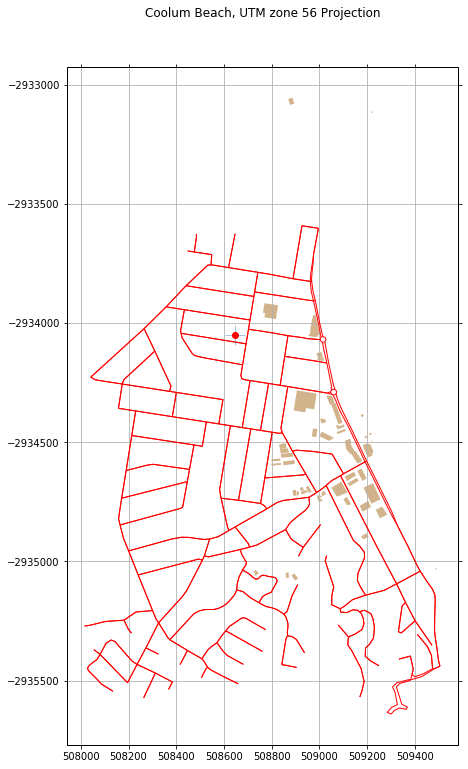

In [38]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM(gdf.crs['zone'], southern_hemisphere=False)  ) 

gdf.plot(ax=ax,  edgecolor='red', linewidth=1)

# plot marker with lon / lat
home_lat, home_lon = -26.527,153.08679
ax.plot(home_lon, home_lat, marker='+', transform=ccrs.PlateCarree(), markersize=20, alpha=0.4 )

# plot same marker in raw UTM coords
x1, y1 =ax.projection.transform_point(home_lon, home_lat, src_crs=ccrs.PlateCarree()) 
ax.plot(x1, y1, marker='o', color='red')

# cartopy Gridlines don't work for UTM
#ax.gridlines(crs=ccrs.PlateCarree(), linestyle='-', xlocs=[508000, 508500, 509000, 509500],
#           ylocs=[-2935000, -2934500])

label_utm_grid()

plt.tight_layout()
ax.set_title('Coolum Beach, UTM zone 56 Projection', pad=50)

# plotting gdfb2 in same projection as Axes, so no transform parameter needed
gdfb = ox.buildings_from_point((home_lat, home_lon), distance=1000)
gdfb2 = ox.projection.project_gdf(gdfb)
gdfb2.plot(ax=ax, color='tan')

plt.show()

### GeoPandas plot the road network in UTM

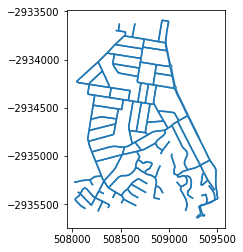

In [39]:
gdf.plot()

## Show Building Types

In [40]:
b.head()

,amenity,building,geometry,name,nodes,source
44476592,pub,yes,"POLYGON ((153.0900859 -26.5262297, 153.090177 ...",Coolum Beach Hotel,"[565204784, 565204782, 565204786, 565204787, 5...",NaN
186393734,NaN,yes,"POLYGON ((153.0952367 -26.5358158, 153.0952163...",NaN,"[1970751616, 1970751734, 1970751665, 197075154...",NaN
186396567,NaN,yes,"POLYGON ((153.09208 -26.5300194, 153.0921143 -...",NaN,"[1970785909, 1970785937, 1970785840, 197078583...",NaN
186396571,NaN,yes,"POLYGON ((153.0921678 -26.5311563, 153.0922161...",Surf Life Saving Club,"[1970785933, 1970785831, 1970785919, 197078590...",NaN
186396572,NaN,yes,"POLYGON ((153.0922355 -26.5308675, 153.0922673...",NaN,"[1970785839, 1970785935, 1970785897, 197078583...",NaN


## Network Statistics

In [41]:
stats = ox.stats.basic_stats(graph1)
[print(key, ' = ',value) for key,value in stats.items()];

n  =  160
m  =  387
k_avg  =  4.8375
intersection_count  =  135
streets_per_node_avg  =  2.7875
streets_per_node_counts  =  {0: 0, 1: 25, 2: 0, 3: 119, 4: 16}
streets_per_node_proportion  =  {0: 0.0, 1: 0.15625, 2: 0.0, 3: 0.74375, 4: 0.1}
edge_length_total  =  49888.636999999966
edge_length_avg  =  128.91120671834616
street_length_total  =  26577.452999999987
street_length_avg  =  127.16484688995209
street_segments_count  =  209
node_density_km  =  None
intersection_density_km  =  None
edge_density_km  =  None
street_density_km  =  None
circuity_avg  =  1.0537331565514203
self_loop_proportion  =  0.002583979328165375
clean_intersection_count  =  None
clean_intersection_density_km  =  None


In [42]:
stats = ox.stats.extended_stats(graph1)
[print(key, ' = ',value) for key,value in stats.items() if type(value)!=dict];

avg_neighbor_degree_avg  =  2.6578125000000004
avg_weighted_neighbor_degree_avg  =  0.03251139865374545
degree_centrality_avg  =  0.030424528301886855
clustering_coefficient_avg  =  0.04895833333333331
clustering_coefficient_weighted_avg  =  0.01267093013533005
pagerank_max_node  =  4353368556
pagerank_max  =  0.014213676085483755
pagerank_min_node  =  5601649662
pagerank_min  =  0.0014388900648418831


## Routing

In [44]:
place_name = "Coolum Beach, Queensland, Australia"

graph1 = ox.graph_from_address(place_name, network_type='drive')

In [45]:
graph_proj = ox.project_graph(graph1)

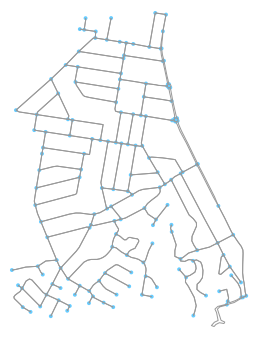

In [46]:
fig, ax = ox.plot_graph(graph_proj)

In [47]:
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

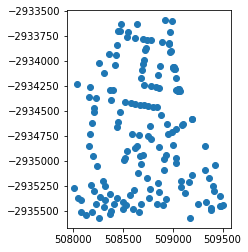

In [48]:
nodes.plot()

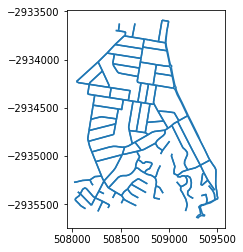

In [49]:
edges.plot()

In [50]:
edges.head(2)

,bridge,geometry,highway,junction,key,length,maxspeed,name,oneway,osmid,ref,u,v
0,NaN,LINESTRING (508988.7154717346 -2934711.0697843...,residential,NaN,0,90.888,NaN,Perry Street,False,34903997,NaN,32941097,409456763
1,NaN,LINESTRING (508988.7154717346 -2934711.0697843...,primary,NaN,0,37.857,NaN,Yandina-Coolum Road,False,4809648,11,32941097,32941099


In [51]:
nodes.head(2)

,highway,lat,lon,osmid,x,y,geometry
32941097,NaN,-26.533,153.09,32941097,508989,-2.93471e+06,POINT (508988.7154717346 -2934711.069784305)
32941099,NaN,-26.5331,153.09,32941099,508957,-2.93473e+06,POINT (508956.5535119515 -2934731.00471665)


In [52]:
union = edges.unary_union

In [53]:
type(union)

shapely.geometry.multilinestring.MultiLineString

In [54]:
union.bounds

(508015.7457238136,
 -2935639.784169429,
 509506.13768639223,
 -2933592.2880380666)

In [55]:
print(union.centroid)

POINT (508740.5605013792 -2934694.183504221)


In [56]:
mid_point = union.centroid.xy[1][0],union.centroid.xy[0][0]

In [57]:
# get nearest node to centre
mid_node_id, dist = ox.utils.get_nearest_node(graph_proj, 
                                           mid_point, 
                                           method='euclidean', 
                                           return_dist=True)

print(mid_node_id, dist)

nodes.loc[mid_node_id]

409456774 53.959894063808825


highway                                              NaN
lat                                             -26.5324
lon                                              153.088
osmid                                          409456774
x                                                 508772
y                                           -2.93465e+06
geometry    POINT (508771.5119416357 -2934649.983068551)
Name: 409456774, dtype: object

In [58]:
ne_point = (union.bounds[3], union.bounds[2])

ne_point

(-2933592.2880380666, 509506.13768639223)

In [60]:
# get nearest node to NE corner
ne_node_id, dist = ox.utils.get_nearest_node(graph_proj, 
                                           ne_point, 
                                           method='euclidean', 
                                           return_dist=True)

print(ne_node_id, dist)


409455628 510.07576481517117


In [61]:
node1 = nodes.loc[mid_node_id]
node1

highway                                              NaN
lat                                             -26.5324
lon                                              153.088
osmid                                          409456774
x                                                 508772
y                                           -2.93465e+06
geometry    POINT (508771.5119416357 -2934649.983068551)
Name: 409456774, dtype: object

In [62]:
node2 = nodes.loc[ne_node_id]
node2

highway                                              NaN
lat                                              -26.523
lon                                               153.09
osmid                                          409455628
x                                                 508996
y                                            -2.9336e+06
geometry    POINT (508996.1798641289 -2933603.256418266)
Name: 409455628, dtype: object

In [63]:
type(node1)

pandas.core.series.Series

In [64]:
route=nx.shortest_path(G=graph_proj, 
                       source=mid_node_id, 
                       target=ne_node_id, 
                       weight='length')

In [35]:
def label_utm_grid2(ax):
    ''' Warning: should only use with small area UTM maps '''    

    for val,label in zip(ax.get_xticks(), ax.get_xticklabels()):
        label.set_text(str(val))
        label.set_position((val,0))  

    for val,label in zip(ax.get_yticks(), ax.get_yticklabels()):   
        label.set_text(str(val))
        label.set_position((0,val))  

    plt.tick_params(bottom=True,top=True,left=True,right=True,
            labelbottom=True,labeltop=False,labelleft=True,labelright=False)

    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    plt.grid(True)

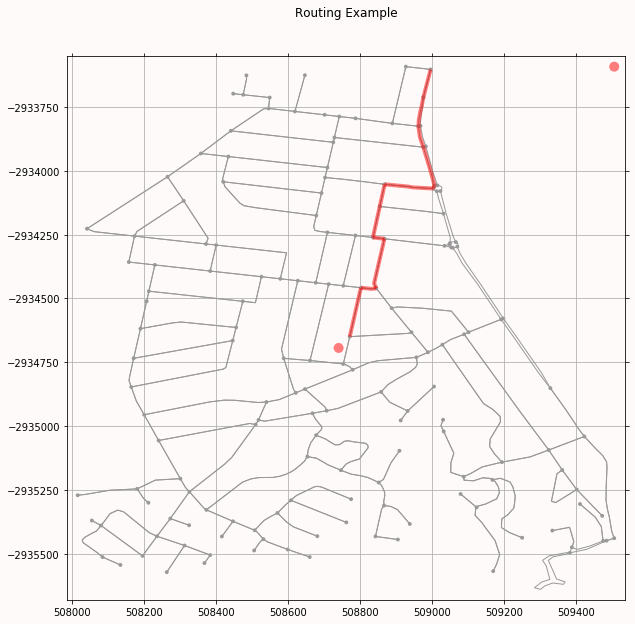

In [91]:
fig, ax = ox.plot.plot_graph_route(graph_proj, 
                              route, 
                              fig_height=10, 
                              fig_width=10, 
                              show=False, 
                              save=False, 
                              close=False,
                              annotate=False,
                              origin_point=mid_point,
                              destination_point=ne_point,
                              orig_dest_point_color='red',
                                   bgcolor='snow',
                                   axis_off=False, 
                             )

ax.set_title('Routing Example', pad=40)
label_utm_grid2(ax)


fig.set_frameon(True)
plt.show()
                              

-----------------------------------
## Walking Distance Example

In [100]:
# add an edge attribute for time in minutes required to traverse each edge
trip_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #in minutes
travel_speed = 4.5 #walking speed in km/hour

meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute

for u, v, k, data in graph_proj.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [101]:
walk_colors = ox.get_colors(n=len(trip_times), cmap='plasma', start=0.3, return_hex=True)

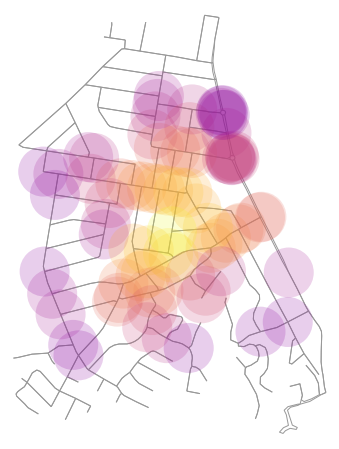

In [103]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), walk_colors):
    subgraph = nx.ego_graph(graph_proj, mid_node_id, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
    #end for
#end for
nc = [node_colors[node] if node in node_colors else 'none' for node in graph_proj.nodes()]
ns = [50*50 if node in node_colors else 0 for node in graph_proj.nodes()]
fig, ax = ox.plot_graph(graph_proj, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.2, node_zorder=2)

## get network from bounding box

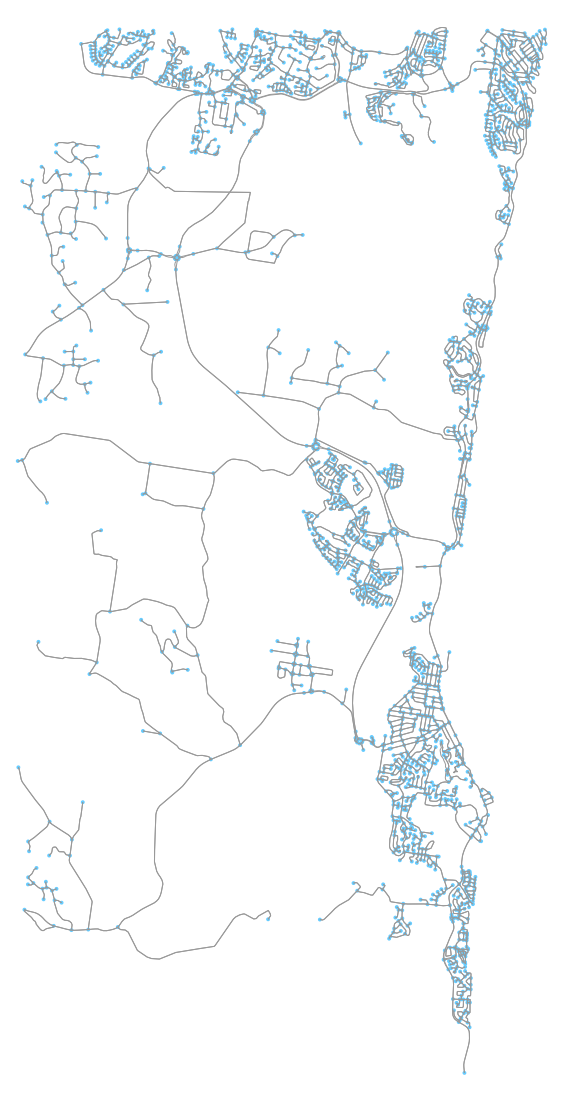

In [104]:

                 
home = ( 153, 153.2, -26.6, -26.4)

graph = ox.graph_from_bbox(home[3], home[2], home[1], home[0], network_type='drive') 

fig, ax = ox.plot_graph(graph,fig_height=20, fig_width=20, )


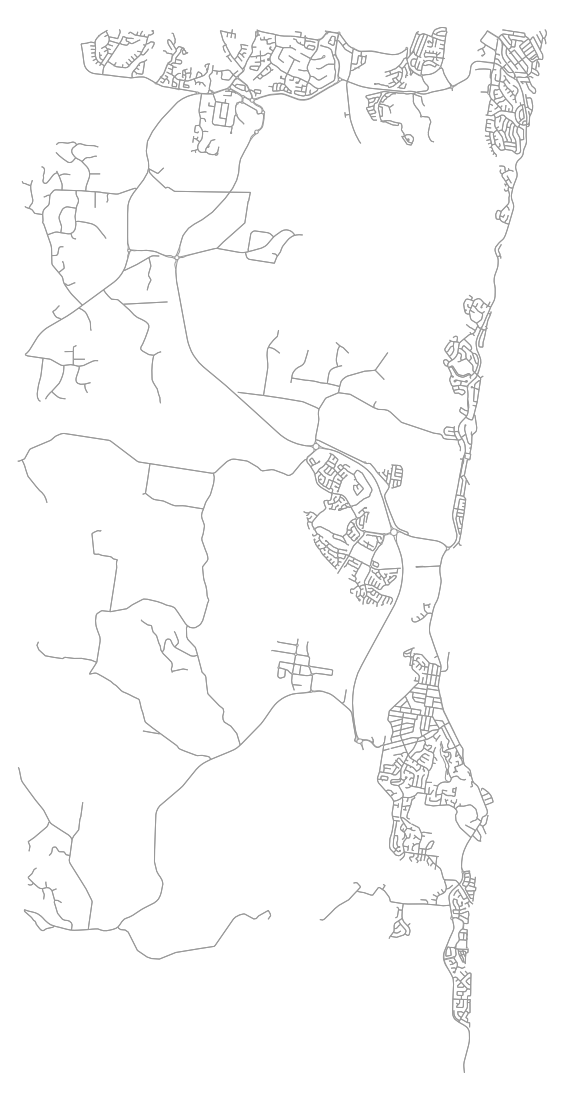

In [105]:

fig, ax = ox.plot_graph(graph,fig_height=20, fig_width=20, node_size=0)

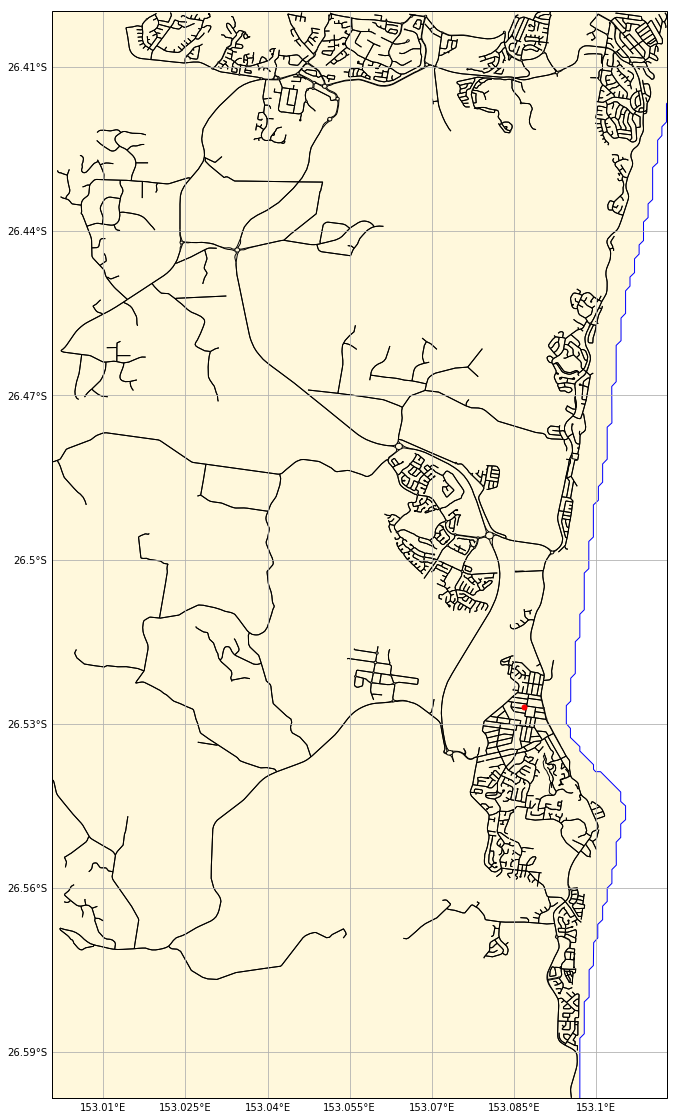

In [28]:

fig = plt.figure(figsize=(20, 20) )
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()  ) 
               
home = ( 153, 153.2, -26.6, -26.4)

graph = ox.graph_from_bbox(home[3], home[2], home[1], home[0], network_type='drive') 

n_df, e_df = ox.save_load.graph_to_gdfs(graph, nodes=True, edges=True)

bounds = e_df.unary_union.bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.PlateCarree() )

e_df.plot(ax=ax, linewidth=1, edgecolor='black')

coast_name = 'D:\\Water\\Coastline\\OZ_GSHHS_f_L1.shp'
coast = gpd.read_file(coast_name)

coast.plot(ax=ax, edgecolor='blue', facecolor='cornsilk')

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# plot marker with lon / lat
home_lat, home_lon = -26.527,153.08679
ax.plot(home_lon, home_lat, marker='o', transform=ccrs.PlateCarree(), markersize=5, alpha=1, color='red', zorder=5 )

plt.show()

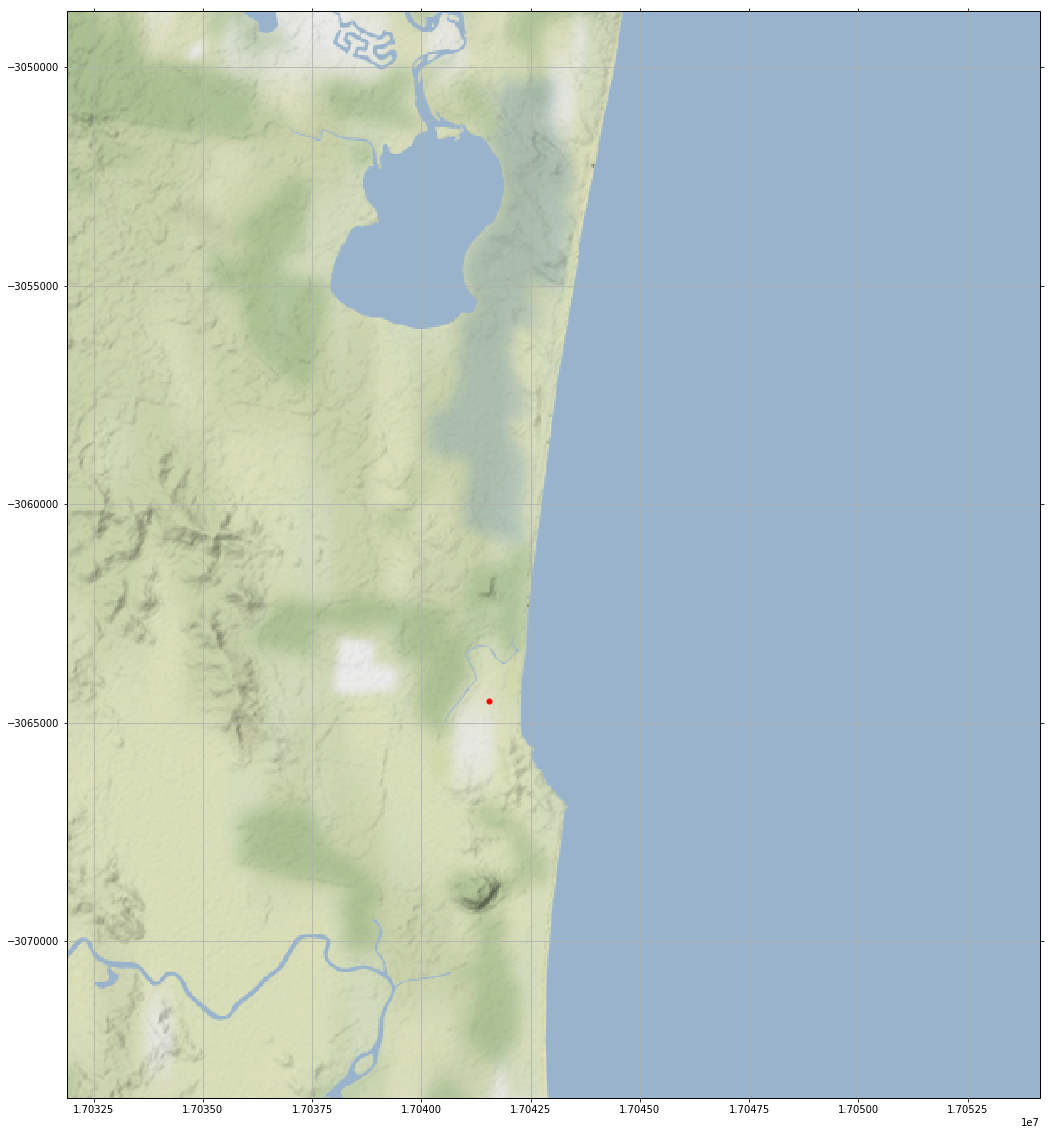

In [36]:
class StamenToner(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = 'http://tile.stamen.com/terrain-background/{}/{}/{}.png'.format(z, x, y)
        return url
    #end _image_url
#end StamenToner

imagery = StamenToner()


fig = plt.figure(figsize=(20, 20) )
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs  ) 
               
home = ( 153, 153.2, -26.6, -26.4) #home = ( 152.5, 153.5, -27, -26)

#graph = ox.graph_from_bbox(home[3], home[2], home[1], home[0], network_type='drive') 

#n_df, e_df = ox.save_load.graph_to_gdfs(graph, nodes=True, edges=True)

#bounds = e_df.unary_union.bounds
ax.set_extent(home, crs=ccrs.PlateCarree() )

# transform e_df to CRS used by image and Axes
#crs_proj4 = imagery.crs.proj4_init
#e_df = e_df.to_crs(crs_proj4)

#e_df.plot(ax=ax, linewidth=1, edgecolor='black', facecolor='none')

#coast_name = 'D:\\Water\\Coastline\\OZ_GSHHS_f_L1.shp'
#coast = gpd.read_file(coast_name)
#coast = coast.to_crs(crs_proj4)

#coast.plot(ax=ax, edgecolor='blue', facecolor='cornsilk')


# plot marker with lon / lat
home_lat, home_lon = -26.527,153.08679
ax.plot(home_lon, home_lat, marker='o', transform=ccrs.PlateCarree(), markersize=5, alpha=1, color='red', zorder=5 )

ax.add_image(imagery, 12,)

label_utm_grid2(ax=ax)

plt.show()



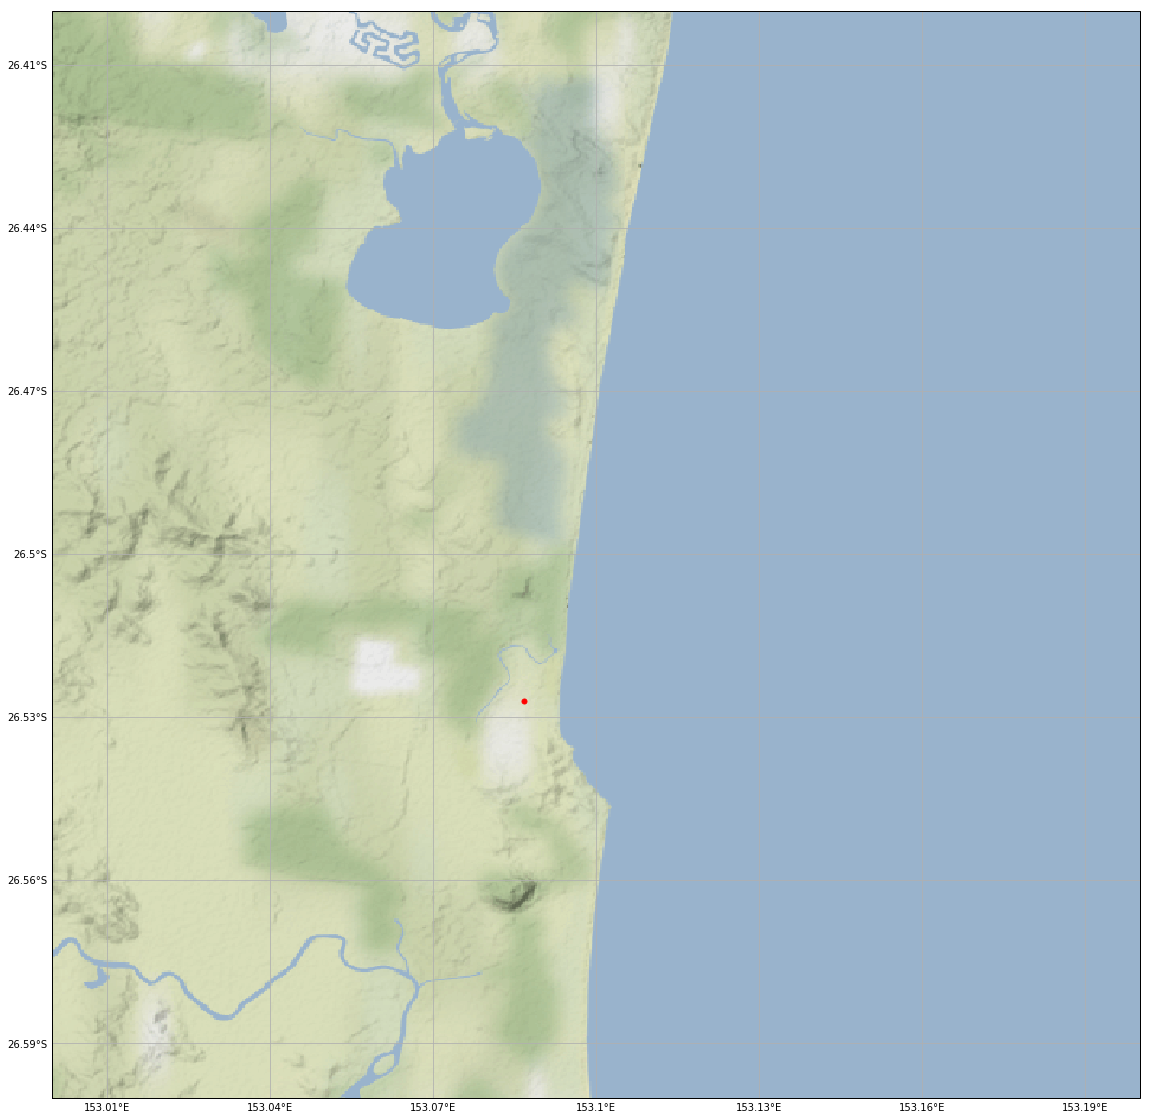

In [12]:
fig = plt.figure(figsize=(20, 20) )
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree() ) 
               
home = ( 153, 153.2, -26.6, -26.4) #home = ( 152.5, 153.5, -27, -26)
ax.set_extent(home, crs=ccrs.PlateCarree() )

# plot marker with lon / lat
home_lat, home_lon = -26.527,153.08679
ax.plot(home_lon, home_lat, marker='o', transform=ccrs.PlateCarree(), markersize=5, alpha=1, color='red', zorder=5 )

ax.add_image(imagery, 12, )

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


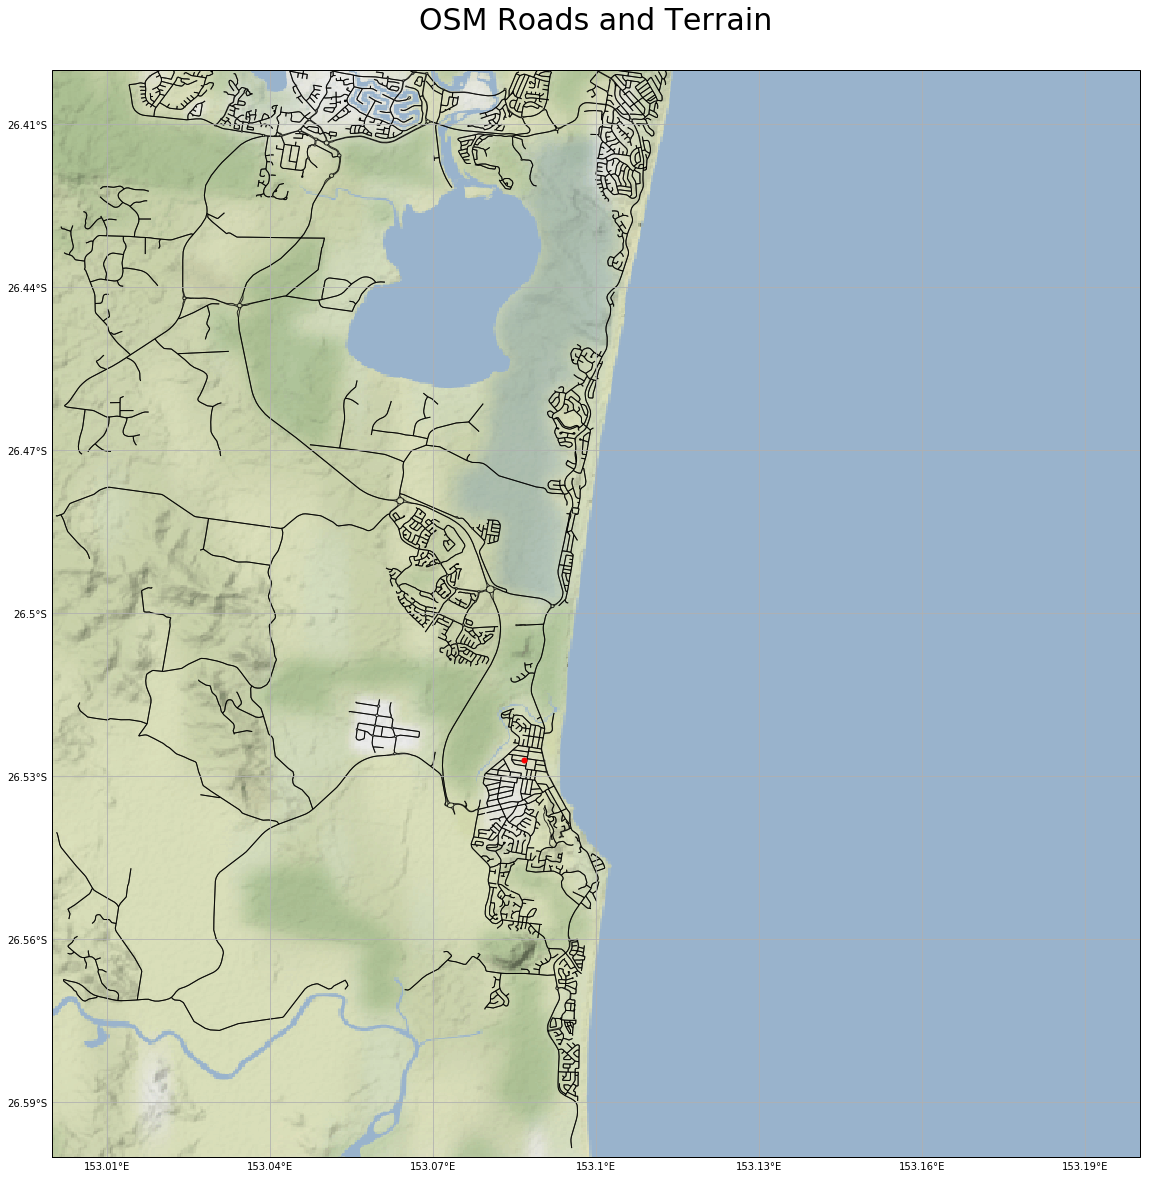

In [27]:
fig = plt.figure(figsize=(20, 20) )
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree() ) 
               
home = ( 153, 153.2, -26.6, -26.4) #home = ( 152.5, 153.5, -27, -26)
ax.set_extent(home, crs=ccrs.PlateCarree() )


graph = ox.graph_from_bbox(home[3], home[2], home[1], home[0], network_type='drive') 

n_df, e_df = ox.save_load.graph_to_gdfs(graph, nodes=True, edges=True)
ax.add_image(imagery, 12, )
e_df.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none', zorder=1, alpha=0.8, )


# plot marker with lon / lat
home_lat, home_lon = -26.527,153.08679
ax.plot(home_lon, home_lat, marker='o', transform=ccrs.PlateCarree(), markersize=5, alpha=1, color='red', zorder=5 )

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('OSM Roads and Terrain', {'fontsize':30}, pad=40)

plt.show()

In [28]:
stats = ox.stats.basic_stats(graph)
[print(key, ' = ',value) for key,value in stats.items()];

n  =  2440
m  =  5446
k_avg  =  4.463934426229508
intersection_count  =  1877
streets_per_node_avg  =  2.5598360655737706
streets_per_node_counts  =  {0: 0, 1: 563, 2: 22, 3: 1784, 4: 69, 5: 1, 6: 1}
streets_per_node_proportion  =  {0: 0.0, 1: 0.23073770491803278, 2: 0.009016393442622951, 3: 0.7311475409836066, 4: 0.028278688524590163, 5: 0.0004098360655737705, 6: 0.0004098360655737705}
edge_length_total  =  920683.1399999982
edge_length_avg  =  169.05676459786966
street_length_total  =  494397.18700000003
street_length_avg  =  157.10110803940262
street_segments_count  =  3147
node_density_km  =  None
intersection_density_km  =  None
edge_density_km  =  None
street_density_km  =  None
circuity_avg  =  1.113567689598215
self_loop_proportion  =  0.019463826661770108
clean_intersection_count  =  None
clean_intersection_density_km  =  None


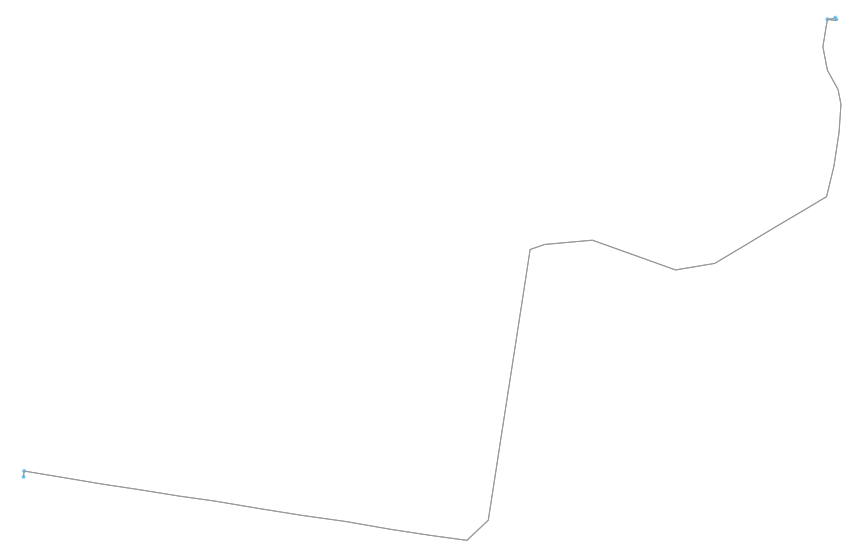

In [29]:



graph = ox.graph_from_bbox(home[3], home[2], home[1], home[0], infrastructure='way["power"~"line"]') 
fig, ax = ox.plot_graph(graph, fig_height=10,)

#n_df, e_df = ox.save_load.graph_to_gdfs(graph, nodes=True, edges=True)

In [37]:
stats = ox.stats.basic_stats(graph)
[print(key, ' = ',value) for key,value in stats.items()];

n  =  5
m  =  8
k_avg  =  3.2
intersection_count  =  2
streets_per_node_avg  =  1.8
streets_per_node_counts  =  {0: 0, 1: 3, 2: 0, 3: 2}
streets_per_node_proportion  =  {0: 0.0, 1: 0.6, 2: 0.0, 3: 0.4}
edge_length_total  =  12441.848
edge_length_avg  =  1555.231
street_length_total  =  6220.924
street_length_avg  =  1555.231
street_segments_count  =  4
node_density_km  =  None
intersection_density_km  =  None
edge_density_km  =  None
street_density_km  =  None
circuity_avg  =  1.3543633437958607
self_loop_proportion  =  0.0
clean_intersection_count  =  None
clean_intersection_density_km  =  None


In [32]:
n_df, e_df = ox.save_load.graph_to_gdfs(graph, nodes=True, edges=True)
e_df.head()

,geometry,key,length,oneway,osmid,u,v
0,"LINESTRING (153.0687092 -26.4028889, 153.06863...",0,46.682,False,83991227,977311306,977311376
1,"LINESTRING (153.068266 -26.4028864, 153.068636...",0,46.682,False,83991227,977311376,977311306
2,"LINESTRING (153.068266 -26.4028864, 153.068048...",0,6105.449,False,83991229,977311376,977311467
3,"LINESTRING (153.068266 -26.4028864, 153.068595...",0,40.142,False,549704917,977311376,5309986469
4,"LINESTRING (153.029021 -26.4228983, 153.029044...",0,28.651,False,83991233,977311421,977311467


In [33]:
n_df.head()

,osmid,x,y,geometry
977311306,977311306,153.068709,-26.402889,POINT (153.0687092 -26.4028889)
977311376,977311376,153.068266,-26.402886,POINT (153.068266 -26.4028864)
977311421,977311421,153.029021,-26.422898,POINT (153.029021 -26.4228983)
977311467,977311467,153.029044,-26.422642,POINT (153.0290445 -26.4226415)
5309986469,5309986469,153.068651,-26.402817,POINT (153.0686514 -26.4028169)
